# Exercise Sheet 01: Data preprocessing, visualization, correlation, statistical testing, and modeling

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-10-23**  
**Exercise Sheet Submission Deadline: 2023-11-03, noon (i.e. 12:00), via git or e-mail to aderiyeva@techfak.uni-bielefeld.de**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**PLEASE INDICATE ALL AUTHORS OF THE SUBMISSION IN THIS FIELD**

## Preamble: Data set

In this exercise sheet, we investigate first data exploration activities that can be performed on typical, tabular data sets, up to simple statistical testing.

The file `sheet01_data.csv` contains fictional data as might be produced in an educational study. Each row represents a student participating in the study. The first column is just the student index, the second column indicates the experimental condition the student was in (`0` for control group, `1` for intervention group). The third column is the student's test result on a pre-test, the fourth column is the student's test result on a post-test.

The following line loads this raw data and prints it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

X = np.loadtxt('sheet01_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[  0.   0.  27.  40.]
 [  1.   0.  31.  34.]
 [  2.   0.  30.  nan]
 [  3.   0.  20.  nan]
 [  4.   0.  41.  54.]
 [  5.   0.  39.  51.]
 [  6.   0.  20.  33.]
 [  7.   0.  27.  36.]
 [  8.   0.  79.  83.]
 [  9.   0.  33.  46.]
 [ 10.   0.  22.  29.]
 [ 11.   0.  22.  41.]
 [ 12.   0.  29.  nan]
 [ 13.   0.  25.  nan]
 [ 14.   0.  41.  47.]
 [ 15.   0.  23.  36.]
 [ 16.   0.  17.  30.]
 [ 17.   0.  93. 100.]
 [ 18.   0.  34.  40.]
 [ 19.   0.  23.  27.]
 [ 20.   0.  48.  53.]
 [ 21.   0.  19.  26.]
 [ 22.   0.  28.  33.]
 [ 23.   0.  38.  46.]
 [ 24.   0.  22.  34.]
 [ 25.   0.  34.  45.]
 [ 26.   0.  36.  49.]
 [ 27.   0.  33.  47.]
 [ 28.   0.  40.  41.]
 [ 29.   0.  39.  52.]
 [ 30.   1.  24.  50.]
 [ 31.   1.  38.  62.]
 [ 32.   1.  34.  51.]
 [ 33.   1.  37.  nan]
 [ 34.   1.  31.  44.]
 [ 35.   1.  37.  57.]
 [ 36.   1.  25.  50.]
 [ 37.   1.  23.  37.]
 [ 38.   1.  12.  38.]
 [ 39.   1.  31.  56.]
 [ 40.   1.  36.  46.]
 [ 41.   1.  34.  48.]
 [ 42.   1.  85. 100.]
 [ 43.   1.

### Task 01.01

Write python code to automatically identify outliers, which are defined as any students with a pre-test score higher than 3 standard deviations above the mean. Write python code that removes these outliers from the data set.

In [3]:
# Calc mean and std of pre-test
mean = X[:,2].mean()
std = X[:,2].std()

#Get all the indexes that are outliers
removers = np.where(X[:,2] > mean + std*3)

# Override X. We remove the values by index that are outliers
X = np.delete(X, removers, axis=0)

Print how many points are left in the control group and the intervention group after outlier removal

In [4]:
# Get the length of the occurences of the values 0 and 1 in the experimental condition column
print(f"There are {len(np.where(X[:,1] == 0)[0])} points left after the outlier removal from the control group")
print(f"There are {len(np.where(X[:,1] == 1)[0])} points left after the outlier removal from the intervential group")

There are 28 points left after the outlier removal from the control group
There are 29 points left after the outlier removal from the intervential group


### Task 01.02

Write python code to compute the mean pre- and post-test score, as well as the respective standard deviation, of the control group and the intervention group. Be aware of nan values. Print the results.

In [5]:
# Get the indexes of the non NaN values to filter them out
idxNotNanThirdControl = np.where(~np.isnan(X[:,2]) & (X[:,1] == 0))[0]
idxNotNanForthControl = np.where(~np.isnan(X[:,3]) & (X[:,1] == 0))[0]
idxNotNanThirdInter = np.where(~np.isnan(X[:,2]) & (X[:,1] == 1))[0]
idxNotNanForthInter = np.where(~np.isnan(X[:,3]) & (X[:,1] == 1))[0]

# Get the values for each group

controlPre = X[:,2][idxNotNanThirdControl]
controlPost = X[:,3][idxNotNanForthControl] 

interPre = X[:,2][idxNotNanThirdInter]
interPost = X[:,3][idxNotNanForthInter]

# Print out the statements

print(f"The mean of the pre-test score from the control group is: {controlPre.mean():.2f}")
print(f"The mean of the post-test score from the control group is: {controlPost.mean():.2f}")

print(f"The mean of the pre-test score from the intervential group is: {interPre.mean():.2f}")
print(f"The mean of the post-test score from the intervential group is: {interPost.mean():.2f}")

print(f"The std of the pre-test score from the control group is: {controlPre.std():.2f}")
print(f"The std of the post-test score from the control group is: {controlPost.std():.2f}")

print(f"The std of the pre-test score from the intervential group is: {controlPre.std():.2f}")
print(f"The std of the post-test score from the intervential group is: {controlPost.std():.2f}")

The mean of the pre-test score from the control group is: 30.04
The mean of the post-test score from the control group is: 40.42
The mean of the pre-test score from the intervential group is: 30.21
The mean of the post-test score from the intervential group is: 50.12
The std of the pre-test score from the control group is: 8.03
The std of the post-test score from the control group is: 8.40
The std of the pre-test score from the intervential group is: 8.03
The std of the post-test score from the intervential group is: 8.40


### Task 01.03

Write python code to impute the missing values (that means: nan values) in the post test scores by the mean of the data. HOWEVER, the imputation should be done separately for the control and the intervention group.



In [6]:
# Get the indices of the nan values for each group
nanPreControl = np.where(np.isnan(X[:,2]) & (X[:,1] == 0))[0]
nanPostControl = np.where(np.isnan(X[:,3]) & (X[:,1] == 0))[0]
nanPreInter = np.where(np.isnan(X[:,2]) & (X[:,1] == 1))[0]
nanPostInter = np.where(np.isnan(X[:,3]) & (X[:,1] == 1))[0]

# Replace the indices of the nan values with the corresponding means
X[:,2][nanPreControl] = int(controlPre.mean())
X[:,2][nanPreInter] = int(interPre.mean())
X[:,3][nanPostControl] = int(controlPost.mean())
X[:,3][nanPostInter] = int(interPost.mean())

In [7]:
X

array([[ 0.,  0., 27., 40.],
       [ 1.,  0., 31., 34.],
       [ 2.,  0., 30., 40.],
       [ 3.,  0., 20., 40.],
       [ 4.,  0., 41., 54.],
       [ 5.,  0., 39., 51.],
       [ 6.,  0., 20., 33.],
       [ 7.,  0., 27., 36.],
       [ 9.,  0., 33., 46.],
       [10.,  0., 22., 29.],
       [11.,  0., 22., 41.],
       [12.,  0., 29., 40.],
       [13.,  0., 25., 40.],
       [14.,  0., 41., 47.],
       [15.,  0., 23., 36.],
       [16.,  0., 17., 30.],
       [18.,  0., 34., 40.],
       [19.,  0., 23., 27.],
       [20.,  0., 48., 53.],
       [21.,  0., 19., 26.],
       [22.,  0., 28., 33.],
       [23.,  0., 38., 46.],
       [24.,  0., 22., 34.],
       [25.,  0., 34., 45.],
       [26.,  0., 36., 49.],
       [27.,  0., 33., 47.],
       [28.,  0., 40., 41.],
       [29.,  0., 39., 52.],
       [30.,  1., 24., 50.],
       [31.,  1., 38., 62.],
       [32.,  1., 34., 51.],
       [33.,  1., 37., 50.],
       [34.,  1., 31., 44.],
       [35.,  1., 37., 57.],
       [36.,  

## Data Visualization

### Task 01.04

Display two scatter plots (via `matplotlib.pyplot.scatter`), one for the control group and one for the intervention group, with pre-test score on the x-axis and post-test score on the y-axis. Label the axis and give the plots titles. Interpret these plot: Do you believe that pre- and post-test score correlate?

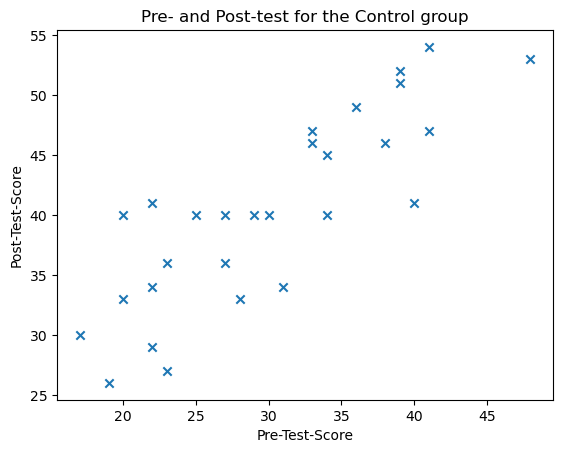

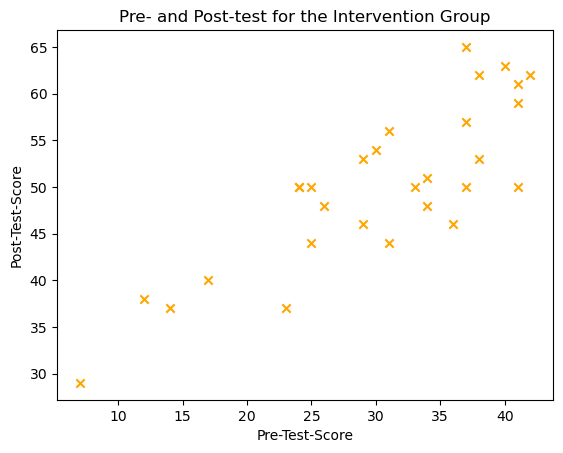

In [8]:
# Get the indices for the control and intervention group
indicesControl = np.where(X[:,1] == 0)[0]
indicesInter = np.where(X[:,1] == 1)[0]

# Plot for the controlgroup
plt.scatter(X[:,2][indicesControl], X[:,3][indicesControl], marker="x")
plt.xlabel("Pre-Test-Score")
plt.ylabel("Post-Test-Score")
plt.title("Pre- and Post-test for the Control group")
plt.show()

# Plot for the Intervention Group
plt.scatter(X[:,2][indicesInter], X[:,3][indicesInter], c="orange", marker="x")
plt.xlabel("Pre-Test-Score")
plt.ylabel("Post-Test-Score")
plt.title("Pre- and Post-test for the Intervention Group")
plt.show()

Yes, I believe that pre- and post-test scores correlate because post-test scores tend to be higher when pre-test scores are higher and vice versa.

### Task 01.05

Display a bar plot with four bars (with error bars): pre-test mean (and standard error) for control and intervention group; and post-test mean (with standard error) for control and intervention group. Label the axes. Interpret this plot: Where are significant differences, do you think? What is your explanation for these differences?

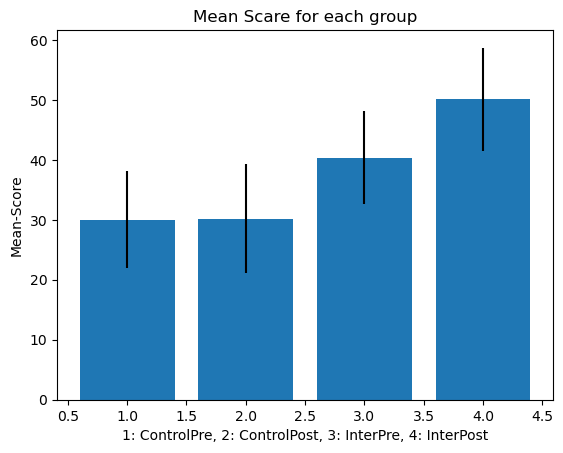

In [9]:
Con = np.where(X[:,1] == 0)[0]
Inter = np.where(X[:,1] == 1)[0]

plt.bar(x=[1,2,3,4], height=[X[:,2][Con].mean(), X[:,2][Inter].mean(), X[:,3][Con].mean(), X[:,3][Inter].mean()], yerr=[X[:,2][Con].std(), X[:,2][Inter].std(), X[:,3][Con].std(), X[:,3][Inter].std()])
plt.xlabel("1: ControlPre, 2: ControlPost, 3: InterPre, 4: InterPost")
plt.ylabel("Mean-Score")
plt.title("Mean Scare for each group")
plt.show()

I think control pre and intervention pre do not differ.
control post is higher than both control pre and intervention pre because the students learned something between pre- and post-test.
intervention post is even higher than control post because students learned more in the intervention than in the control condition.



### Task 01.06

Display a bar plot with two bars (with error bars): the difference between post- and pre-test score for the control group (with standard error) and for the intervention group (with standard error). Label the axes. Interpret this plot: Do you think the difference of post- and pre-test scores significantly differs between control and intervention group?

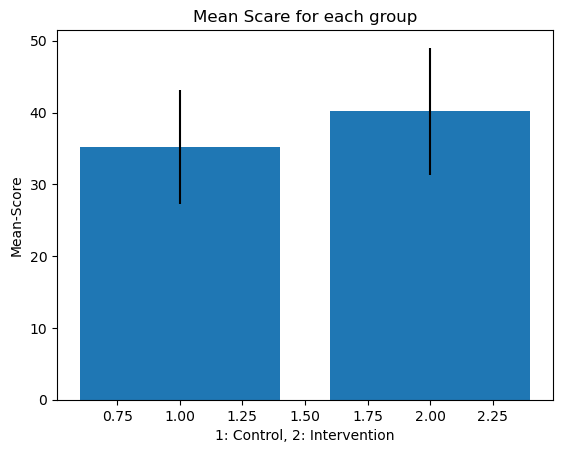

In [10]:
plt.bar(x=[1,2], height=[(X[:,2][Con].mean() + X[:,3][Con].mean())/2, (X[:,2][Inter].mean() + X[:,3][Inter].mean())/2], yerr=[(X[:,2][Con].std() + X[:,3][Con].std())/2, (X[:,2][Inter].std() + X[:,3][Inter].std())/2])
plt.xlabel("1: Control, 2: Intervention")
plt.ylabel("Mean-Score")
plt.title("Mean Scare for each group")
plt.show()

Yes, I think the score difference is significantly higher in the intervention group.

### Task 01.07 (Bonus task)

Display a box plot with four boxes: pre-test results in the control and intervention group, and post-test results in the control and intervention group. Label the axes.

### Task 01.08 (Bonus Task)

Display a box plot with two boxes: difference between post-test and pre-test scores for the control group and the intervention group.

## Statistical Testing

### Task 01.09

Write a python function to compute the Pearson correlation between two arrays of the same size.

In [11]:
def pearson_correlation(x,y):
    if len(x) != len(y):
        return -1

    mean_x = np.mean(x)
    mean_y = np.mean(y)
    sigma_x = np.std(x)
    sigma_y = np.std(y)

    r = 0
    for i in range(len(x)):
        r += ((x[i] - mean_x)/sigma_x) * ((y[i] - mean_y)/sigma_y)
    r /= len(x)
    
    return r

### Task 01.10

Use your function to compute the Pearson correlation between pre-test and post-test scores for both control and intervention condition and print the scores.

Interpret the strength of the correlation using the following rule of thumb from [Mukaka (2012)](https://www.ajol.info/index.php/mmj/article/download/81576/71739):

* A correlation of $0.3 < |r| \leq 0.5$ is considered small.
* A correlation of $0.5 < |r| \leq 0.7$ is considered moderate.
* A correlation of $0.7 < |r| \leq 0.9$ is considered high.
* A correlation of $0.9 < |r| \leq 1.0$ is considered very high.

In [12]:
r_control = pearson_correlation(X[:,2][indicesControl], X[:,3][indicesControl])
r_inter = pearson_correlation(X[:,2][indicesInter], X[:,3][indicesInter])

print(f"The r-value for the control group is: {r_control}")
print(f"The r-value for the intervention group is: {r_inter}")

The r-value for the control group is: 0.836960879341906
The r-value for the intervention group is: 0.8368009048184849


Validate your scores by computing the Pearson correlation again with `scipy.stats.pearsonr`. Print both `r` and the `p` value returned by the function for both the control and the intervention condition. Are the correlations statistically significant at $0.01$ level?

In [13]:
p_control = scipy.stats.pearsonr(X[:,2][indicesControl], X[:,3][indicesControl])
p_interve = scipy.stats.pearsonr(X[:,2][indicesInter], X[:,3][indicesInter])

print(f"The r-value for the control group is: {p_control[0]} with a p-value of {p_control[1]}")
print(f"The r-value for the intervention group is: {p_interve[0]} with a p-value of {p_interve[1]}")

The r-value for the control group is: 0.8369608793419059 with a p-value of 2.846121307911989e-08
The r-value for the intervention group is: 0.8368009048184848 with a p-value of 1.5485957837782414e-08


#### Answers:

According to Mukaka, the correlation between pre- and post-test scores is high in both the control and the intervention group.

The correlations are statistically significant at 0.01 level, because from chance that the correlation is random is at 1% which is a sufficiently low probability.

### Task 01.11

Write a python function that performs a Welch $t$-test. In particular, your function should:
1. compute the number of data points, the mean, and the standard deviation of both samples (use the `ddof = 1` parameter for the `np.std` function).
2. compute the pooled standard deviation as
\begin{equation}
\sigma_\text{pooled} = \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}
\end{equation}
  where $n_x$ and $n_y$ are the number of data points in the two samples and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.
3. compute the $t$-statistic as 
\begin{equation}
t = -\Big|\frac{\mu_x - \mu_y}{\sigma_\text{pooled}}\Big|
\end{equation}
  where $\mu_x$ and $\mu_y$ are the means of the two samples.
4. compute the number of degree of freedom via the Welch-Satterthwaite equation, meaning:
\begin{equation}
\text{df} = \frac{\sigma_\text{pooled}^4}{\frac{\sigma_x^4}{n_x^2\cdot(n_x - 1)} + \frac{\sigma_y^4}{n_y^2\cdot(n_y - 1)}}
\end{equation}
5. compute $p$ as twice the probability of any $t$ value equal or smaller to your value using the `cdf` function of `scipy.stats.t` with the number of freedoms as computed in the previous step.

Your function should return both $t$ and $p$.

### Task 01.12

Write python code to perform the following Welch tests (using your function):
1. the pre-test scores in the control versus the intervention condition
2. the post-test scores in the control versus the intervention condition
3. the differences between post- and pre-test scores in the control versus the intervention condition

For each of the tests, print the $t$ and $p$.

Which of the test results are significant at a $0.01$-level?

**Hint:** You can validate that your function returns the correct $t$ and $p$ values by comparing to the output of the function `scipy.stats.ttest_ind` with `equal_var = False`.

### Task 01.13

Compute the effect sizes for the difference in post-test minus pre-test score between control and intervention condition using the formula

\begin{equation}
d = \frac{|\mu_x - \mu_y|}{\sqrt{\frac{1}{2}(\sigma_x^2 + \sigma_y^2)}}
\end{equation}

where $\mu_x$ and $\mu_y$ are the mean score difference in intervention and control condition and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.

Print the effect size and interpret the size of the effect using the following rule of thumb (by [Sawilowsky (2009)](https://digitalcommons.wayne.edu/cgi/viewcontent.cgi?article=1536&context=jmasm))
* An effect of size $0.01 < d \leq 0.2$ is considered very small.
* An effect of size $0.2 < d \leq 0.5$ is considered small.
* An effect of size $0.5 < d \leq 0.8$ is considered moderate.
* An effect of size $0.8 < d \leq 1.2$ is considered large.
* An effect of size $1.2 < d \leq 2.0$ is considered very large.
* An effect of size $d > 2.0$ is considered huge.

### Task 01.14 (Bonus Task)

Write python code that uses the wilcoxon sign rank test (via `scipy.stats.wilcoxon`) to check whether the post-test scores in the control condition are significantly different from the pre-test scores. Repeat the same analysis for the intervention condition.

## Probabilistic Modeling

Let's assume that a student does a test in which they can achieve a certain number of points in the real numbers. Further, assume that the number of points achieved is generated from a Gaussian distribution with standard deviation $\sigma$. However, the mean of the distribution depends on whether the student has understood the topic or not.

### Task 01.15

Formalize this scenario. In particular:
1. Model a random variable $Z$ that indicates whether the student understood the topic or not. What is the domain? What is the probability mass function $p_Z$? What are the parameters of this function?
2. Model a random variable $X$ for the number of points the student achieves on the test. What is the conditional probability density function $p_{X|Z}$? What are the parameters of this function?

**ANSWER**

### Task 01.16

Using Bayes' theorem and the law of total probability, compute the conditional probability mass $p_{Z|X}(1|x)$ for the student having understood the topic given their achieved number of points.

**ANSWER**

### Task 01.17

Assume that the numbers $x_1, \ldots, x_m \in \mathbb{R}$ are generated (independently) from a Gaussian with mean $\mu$ and standard deviation $\sigma$.

1. What is the negative log likelihood of the data under this assumption?
2. Prove that $\mu$ and $\sigma^2$ which minimize the negative log likelihood are exactly $\mu = \frac{1}{m} \sum_{i=1}^m x_i$ and $\sigma^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu)^2$. You may assume that the negative log likelihood is convex, in this case.

**ANSWER**